# Schwefel’s function

### Градиентный спуск

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-whitegrid')
%matplotlib inline
from random import uniform, random
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def schwefel1(x):
    res = x * np.sin(np.sqrt(np.abs(x)))
    return 418.9829 * N - res

In [3]:
def grad_step1(f, x, step = 0.01):
    grad = - math.sin(math.sqrt(math.fabs(x))) - math.sqrt(math.fabs(x)) * math.cos(math.sqrt(math.fabs(x))) / 2.
    if (random() > 0.9):
        return x - step * grad
    else:
        return x - step * (grad + uniform(-0.1, 0.1))

In [4]:
def gradient1(x_0, Xs, Ys):
    x = x_0
    for i in range(100): # число шагов
        x = grad_step1(schwefel1, x, 1)
        Xs.append(x)
        Ys.append(schwefel1(x))
    return x

In [8]:
%%time
Xo = []
Yo = []
x_best = gradient1(-200, Xo, Yo)
print(x_best, schwefel1(x_best))

(-124.82376664092689, 715.0896305154416)
CPU times: user 1.59 ms, sys: 325 µs, total: 1.92 ms
Wall time: 2.18 ms


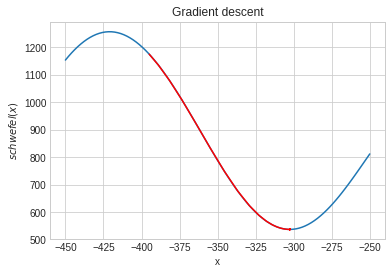

In [11]:
x = np.linspace(-450, -250, 100)
plt.plot(x, schwefel1(x))
plt.plot(Xo, Yo, color="red")
plt.title('Gradient descent')
plt.ylabel('$schwefel(x)$')
plt.xlabel('x')
plt.show()

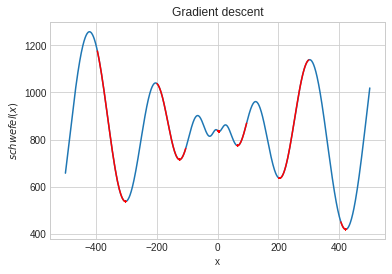

In [9]:
x = np.linspace(-500, 500, 1000)
plt.plot(x, schwefel1(x))
Xo = []
Yo = []
gradient1(0, Xo, Yo)
plt.plot(Xo, Yo, color="red")
for i in range(5):
    Xo = []
    Yo = []
    gradient1(100 * i, Xo, Yo)
    plt.plot(Xo, Yo, color="red")
    Xo = []
    Yo = []
    gradient1(-100 * i, Xo, Yo)
    plt.plot(Xo, Yo, color="red")
plt.title('Gradient descent')
plt.ylabel('$schwefel(x)$')
plt.xlabel('x')
plt.show()

In [7]:
N=2

In [882]:
def schwefel(x):
    res = 0
    for i in range(N):
        res += x[i] * math.sin(math.sqrt(math.fabs(x[i])))
    return 418.9829 * N - res

In [883]:
schwefel([420.9687, 420.9687])

2.545567497236334e-05

In [884]:
def schwefel_2(x, y):
    res = x * np.sin(np.sqrt(np.abs(x)))
    res += y * np.sin(np.sqrt(np.abs(y)))
    return 418.9829 * N - res

Определим функцию для градиентного спуска из заданной точки для двумерного случая

In [885]:
def grad_step(f, x, step = 0.01):
    grad = np.array([])
    for i in range(N):
        grad = np.append(grad, - math.sin(math.sqrt(math.fabs(x[i]))) - math.sqrt(math.fabs(x[i])) * math.cos(math.sqrt(math.fabs(x[i]))) / 2)
    if (random() > 0.9):
        return x - step * grad
    else:
        return x - step * (grad + np.array([random(), random()]))

In [886]:
def gradient(x_0, Xs, Ys, Zs):
    x = x_0
    for i in range(200): # число шагов
        x = grad_step(schwefel, x, 1)
        Xs.append(x[0])
        Ys.append(x[1])
        Zs.append(schwefel(x))
    return x

Определим функцию поиска, которая запускает n градиентных спусков из случайных точек

In [887]:
def rand_gradient_search(n, Xs, Ys, Zs):
    first = True
    for i in range(n):
        x = np.array([uniform(-500., 500.), uniform(-500., 500.)])
        if (first):
            x_best = x
            first = False
        x_res = gradient(x, Xs, Ys, Zs)
        if ((schwefel(x_best) > schwefel(x_res)) &
            (x_res[0] < 500.) & (x_res[0] > -500.) & 
            (x_res[1] < 500.) & (x_res[1] > -500.)):
            x_best = x_res
    return x_best

In [888]:
%%time
Xr = []
Yr = []
Zr = []
x_best = rand_gradient_search(50, Xr, Yr, Zr) # первый параметр - необходимое число точек в сетке поиска
print(schwefel(x_best), x_best)

(0.5075087828188316, array([419.26652285, 419.90711211]))
CPU times: user 411 ms, sys: 7.81 ms, total: 418 ms
Wall time: 432 ms


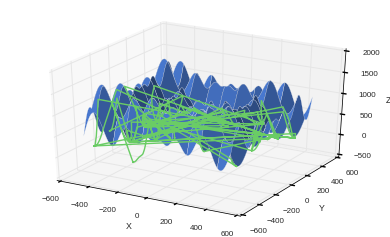

In [988]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-500, 500, 10)
Y = np.arange(-500, 500, 10)
X, Y = np.meshgrid(X, Y)
Z = schwefel_2(X, Y)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot(Xr, Yr, Zr)

plt.show()

Опредеим функцию поиска, которая запускает сетку из n градиентных спусков

In [890]:
def grid_gradient_search_quarter(x, x_best, Xs, Ys, Zs):
    x_res = gradient(x, Xs, Ys, Zs)
    if ((schwefel(x_best) > schwefel(x_res)) &
        (x_res[0] < 500.) & (x_res[0] > -500.) & 
        (x_res[1] < 500.) & (x_res[1] > -500.)):
        x_best = x_res
    return x_best

In [891]:
def grid_gradient_search(n, Xs, Ys, Zs):
    first = True
    size = 500
    k = int(math.sqrt(n) / 2) + 1
    for i in range(k):
        for j in range(k):
            a = (size * i / k) # координата по x в сетке
            b = (size * j / k) # координата по y в сетке
            
            x = np.array([a, b])
            if (first):
                x_best = x
                first = False
            x_best = grid_gradient_search_quarter(x, x_best, Xs, Ys, Zs)
                
            x = np.array([-a, b])
            x_best = grid_gradient_search_quarter(x, x_best, Xs, Ys, Zs)
                
            x = np.array([a, -b])
            x_best = grid_gradient_search_quarter(x, x_best, Xs, Ys, Zs)
                
            x = np.array([-a, -b])
            x_best = grid_gradient_search_quarter(x, x_best, Xs, Ys, Zs)
    return x_best

Создадим пустые массивы для хранения точек, по которым идёт градиентный спуск: Xs, Ys, Zs

In [892]:
%%time
Xs = []
Ys = []
Zs = []
x_best = grid_gradient_search(50, Xs, Ys, Zs) # первый параметр - необходимое число точек в сетке поиска
print(schwefel(x_best), x_best)

(0.8514985004297841, array([419.09847555, 419.16433283]))
CPU times: user 515 ms, sys: 3.85 ms, total: 519 ms
Wall time: 527 ms


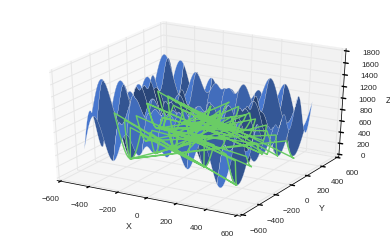

In [989]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-500, 500, 10)
Y = np.arange(-500, 500, 10)
X, Y = np.meshgrid(X, Y)
Z = schwefel_2(X, Y)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot(Xs, Ys, Zs)

plt.show()

Сравним время работы градиентного спуска с алгоритмом BFGS из модуля optimize

In [894]:
%%time
optimize.minimize(schwefel, [-400,400], method='BFGS')

CPU times: user 2.61 ms, sys: 0 ns, total: 2.61 ms
Wall time: 2.21 ms


      fun: 118.43836006959475
 hess_inv: array([[3.98405061, 0.02063658],
       [0.02063658, 3.95337299]])
      jac: array([-7.62939453e-06, -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([-302.52494932,  420.96874442])

### Алгоритм имитации отжига

Определим расстояние между двумя точками

In [991]:
def distance1(x, y):
    return math.sqrt(x**2+y**2)

In [992]:
def step1(point, R):
    x = point
    while(1): # выбираем случайные решения задачи до тех пор, пока они не попадут в нужный диапазон
        x_step = R * uniform(-1., 1.)
        if(((x + x_step) < 500.) & ((x + x_step) > -500.)):
            return x + x_step

In [993]:
def allowance1(x, x_step, x_best, T):
    delta = schwefel1(x_step) - schwefel1(x)
    if (delta < 0): # если измененное решение имеет меньшую энергию, то оно принимается за текущее
        return x_step
    else: # если же измененное решение имеет большую энергию, то оно принимается с вероятностью P = exp(-δE/T)
        p = math.exp((schwefel1(x_best) - schwefel1(x_step)) / T)
        if (random() < p):
            return x_step
        else:
            return x

In [1021]:
def simulated_annealing1(Xa, Ya, Error):
    x_0 = 500 * uniform(-1., 1.)
    T = 100.
    k = 0.999 # коэффициент уменьшения температуры
    R = 300. # радиус шага по одной оси
    x = x_best = x_0
    
    while (T > 0.0000001):
        x = allowance1(x, step1(x, R), x_best, T) # делаем шаг с учётом допуска
        Error.append(distance1(x, 420.9687))
        if (schwefel1(x) < schwefel1(x_best)):
            x_best = x
        T = update_temerature(T, k) # уменьшение температуры
        Xa.append(x)
        Ya.append(schwefel1(x))
    
    return x, x_best

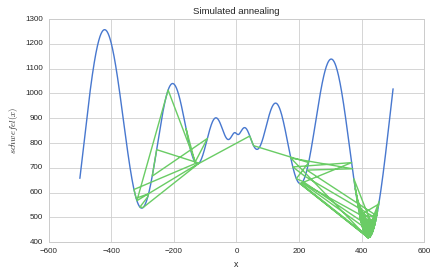

In [1022]:
x = np.linspace(-500, 500, 1000)
plt.plot(x, schwefel1(x))
Xe = []
Ye = []
Error1 = []
x, x_best = simulated_annealing1(Xe, Ye, Error1)
plt.plot(Xe, Ye)
plt.title('Simulated annealing')
plt.ylabel('$schwefel(x)$')
plt.xlabel('x')
plt.show()

In [1057]:
def distance(x, y):
    res = 0
    for i in range(len(x)):
        res += (x[i] - y[i])**2
    return math.sqrt(res)

In [1058]:
def update_temerature(T, k):
    return T * k

In [1059]:
def step(point, R):
    x = point[0]
    y = point[1]
    while(1): # выбираем случайные решения задачи до тех пор, пока они не попадут в нужный диапазон
        x_step = R * uniform(-1., 1.)
        y_step = R * uniform(-1., 1.)
        if(((x + x_step) < 500.) & ((x + x_step) > -500.)
          & ((y + y_step) < 500.) & ((y + y_step) > -500.)):
            return np.array([x + x_step, y + y_step])

In [1060]:
def allowance(x, x_step, x_best, T):
    delta = schwefel(x_step) - schwefel(x)
    if (delta < 0): # если измененное решение имеет меньшую энергию, то оно принимается за текущее
        return x_step
    else: # если же измененное решение имеет большую энергию, то оно принимается с вероятностью P = exp(-δE/T)
        p = math.exp((schwefel(x_best) - schwefel(x_step)) / T)
        if (random() < p):
            return x_step
        else:
            return x

In [1061]:
def simulated_annealing(Xa, Ya, Za, Error):
    x_0 = np.array([500 * uniform(-1., 1.), 500 * uniform(-1., 1.)])
    T = 100.
    k = 0.999 # коэффициент уменьшения температуры
    R = 500. # радиус шага по одной оси
    x = x_best = x_0
    
    while (T > 0.0000001):
        x = allowance(x, step(x, R), x_best, T) # делаем шаг с учётом допуска
        Error.append(distance(x, [420.9687, 420.9687]))
        if (schwefel(x) < schwefel(x_best)):
            x_best = x
        T = update_temerature(T, k) # уменьшение температуры
        Xa.append(x[0])
        Ya.append(x[1])
        Za.append(schwefel(x))
    
    return x, x_best

In [1072]:
Error = []
Xa = []
Ya = []
Za = []
x, x_best = simulated_annealing(Xa, Ya, Za, Error)
print(x, x_best)

(array([417.98385186, 421.04034554]), array([417.98385186, 421.04034554]))


In [1073]:
print(schwefel([420.9687, 420.9687]), schwefel(x_best))

(2.545567497236334e-05, 1.123120831166716)


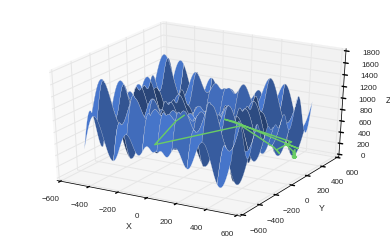

In [1074]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-500, 500, 10)
Y = np.arange(-500, 500, 10)
X, Y = np.meshgrid(X, Y)
Z = schwefel_2(X, Y)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot(Xa, Ya, Za)

plt.show()

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Error')

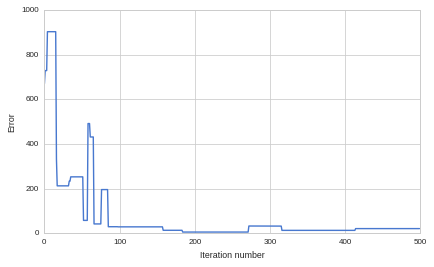

In [1075]:
%pylab inline
plot(range(500), Error[:500])
xlabel('Iteration number')
ylabel('Error')

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Error')

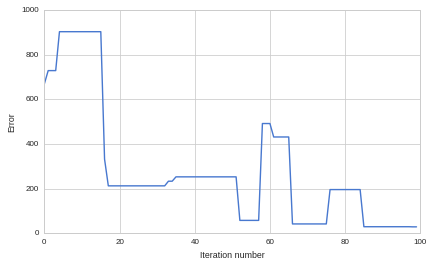

In [1076]:
%pylab inline
plot(range(100), Error[:100])
xlabel('Iteration number')
ylabel('Error')